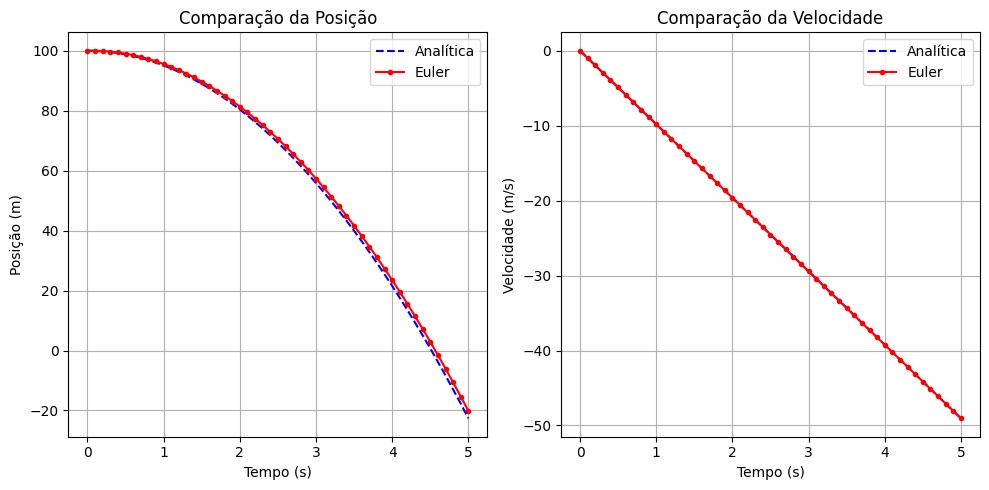

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def analitica_y(t, y0, v0, g):
    """Solução analítica da posição."""
    return y0 + v0 * t - 0.5 * g * t**2

def analitica_v(t, v0, g):
    """Solução analítica da velocidade."""
    return v0 - g * t

def euler_queda_livre(y0, v0, g, dt, T):
    """Resolução numérica pelo método de Euler."""
    t_values = np.arange(0, T + dt, dt)
    y_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)

    # Condições iniciais
    y_values[0] = y0
    v_values[0] = v0

    # Método de Euler
    for i in range(1, len(t_values)):
        v_values[i] = v_values[i-1] - g * dt  # Atualiza velocidade
        y_values[i] = y_values[i-1] + v_values[i-1] * dt  # Atualiza posição

    return t_values, y_values, v_values

def plot_resultados(t, y_analitica, v_analitica, y_euler, v_euler):
    """Gera os gráficos comparando as soluções analítica e numérica."""
    plt.figure(figsize=(10, 5))

    # Gráfico da posição
    plt.subplot(1, 2, 1)
    plt.plot(t, y_analitica, label="Analítica", linestyle="--", color="blue")
    plt.plot(t, y_euler, label="Euler", marker="o", markersize=3, linestyle="-", color="red")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Posição (m)")
    plt.title("Comparação da Posição")
    plt.legend()
    plt.grid()

    # Gráfico da velocidade
    plt.subplot(1, 2, 2)
    plt.plot(t, v_analitica, label="Analítica", linestyle="--", color="blue")
    plt.plot(t, v_euler, label="Euler", marker="o", markersize=3, linestyle="-", color="red")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Velocidade (m/s)")
    plt.title("Comparação da Velocidade")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

def main():
    # Parâmetros do problema
    g = 9.81     # Aceleração da gravidade (m/s²)
    y0 = 100.0   # Posição inicial (m)
    v0 = 0.0     # Velocidade inicial (m/s)
    dt = 0.1     # Passo de tempo (s)
    T = 5.0      # Tempo total da simulação (s)

    # Vetor de tempo
    t_values = np.arange(0, T + dt, dt)

    # Solução analítica
    y_analitica = analitica_y(t_values, y0, v0, g)
    v_analitica = analitica_v(t_values, v0, g)

    # Solução numérica (Euler)
    t_euler, y_euler, v_euler = euler_queda_livre(y0, v0, g, dt, T)

    # Plotar resultados
    plot_resultados(t_values, y_analitica, v_analitica, y_euler, v_euler)

if __name__ == "__main__":
    main()
